In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
news = pd.read_csv('../Data/news_classification_Feb29_24.csv')
test = pd.read_csv('../Data/test_set_Feb29_2024.csv')

In [7]:
import spacy

In [8]:
nlp = spacy.load('en_core_web_md')

In [9]:
# assign X and y
X_train = news.text
y_train = news.label
X_test = test.text
y_test = test.label

In [11]:
X_train.iloc[0]

'21st Century Wire says Ben Stein, reputable professor from, Pepperdine University (also of some Hollywood fame appearing in TV shows and films such as Ferris Bueller s Day Off) made some provocative statements on Judge Jeanine Pirro s show recently.While discussing the halt that was imposed on President Trump s Executive Order on travel.Stein referred to the judgement by the 9th Circuit Court in Washington state as a  Coup d tat against the executive branch and against the constitution.Stein went on to call the Judges in Seattle  political puppets  and the judiciary  political pawns.'

In [14]:
nlp(X_train.iloc[0])

21st Century Wire says Ben Stein, reputable professor from, Pepperdine University (also of some Hollywood fame appearing in TV shows and films such as Ferris Bueller s Day Off) made some provocative statements on Judge Jeanine Pirro s show recently.While discussing the halt that was imposed on President Trump s Executive Order on travel.Stein referred to the judgement by the 9th Circuit Court in Washington state as a  Coup d tat against the executive branch and against the constitution.Stein went on to call the Judges in Seattle  political puppets  and the judiciary  political pawns.

In [31]:
[token.vector for token in nlp(X_train.iloc[0])]

[array([-1.441   , -2.6933  ,  4.6373  , -0.21223 ,  5.3499  ,  6.3975  ,
         3.3495  , -2.0218  , -1.0348  , -0.7203  , -1.2431  , -1.4359  ,
        -5.0335  ,  3.3153  , -1.6935  ,  2.8289  ,  1.7825  , -3.2282  ,
        -0.29719 ,  2.7065  ,  2.0794  ,  0.75453 ,  3.7162  , -2.6691  ,
         3.7856  , -2.5369  ,  4.8157  ,  4.166   ,  4.9631  ,  9.0637  ,
        -1.5159  , -0.79516 ,  5.0244  , -1.3595  , -1.2105  , -4.4809  ,
         2.0129  , -2.2147  , -3.1775  , -2.1034  ,  5.4808  ,  1.2297  ,
        -0.91066 , -5.0252  ,  0.61009 ,  4.0112  , -1.1634  ,  2.9002  ,
         0.80907 , -5.0238  , -1.5075  ,  3.05    , -1.3354  , -2.3306  ,
         1.4875  ,  2.7027  ,  2.4517  , -6.3667  , -1.3723  ,  2.7342  ,
        -0.12015 ,  2.9961  , -1.6924  ,  4.3438  , -3.2549  ,  3.5678  ,
        -2.1351  , -2.656   , -3.3888  , -1.2199  , -1.479   , -4.8131  ,
         0.40318 ,  0.25909 , -4.494   , -0.039011,  1.6248  ,  1.3882  ,
        -0.66049 ,  2.1654  ,  2.1345 

In [32]:
len([token.vector for token in nlp(X_train.iloc[0])])

109

In [34]:
len([token.vector for token in nlp(X_train.iloc[1])])

842

In [22]:
spacy_X_train = X_train.apply(lambda x: nlp(x).vector)
spacy_X_train = np.vstack(spacy_X_train)
spacy_X_test = X_test.apply(lambda x: nlp(x).vector)
spacy_X_test = np.vstack(spacy_X_test)
spacy_X_train.shape, spacy_X_test.shape

((37546, 300), (25, 300))

In [23]:
# initiate the model
lr_classifier = LogisticRegression(max_iter=1000)
# fit the model
lr_classifier.fit(spacy_X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_test_pred = lr_classifier.predict(spacy_X_test)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
test_recall = metrics.recall_score(y_test, y_test_pred, pos_label='real_news')
test_precision = metrics.precision_score(y_test, y_test_pred, pos_label='real_news')

In [25]:
test_accuracy, test_recall, test_precision

(0.32, 0.6153846153846154, 0.4)

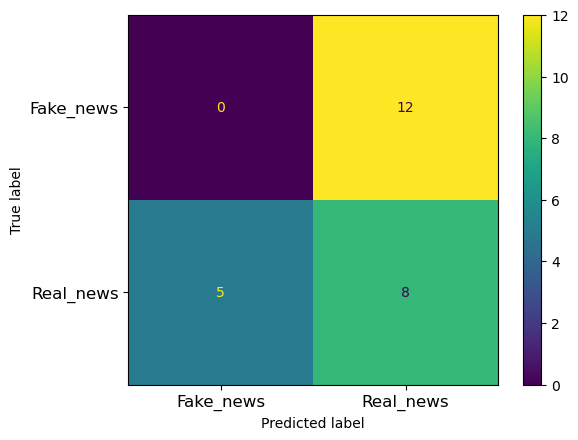

In [26]:
cm = metrics.confusion_matrix(y_test, y_test_pred, labels = lr_classifier.classes_)
fig, ax = plt.subplots()
display_cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Fake_news', 'Real_news'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)
ax.set_yticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)

display_cm.plot(ax = ax)
plt.show()